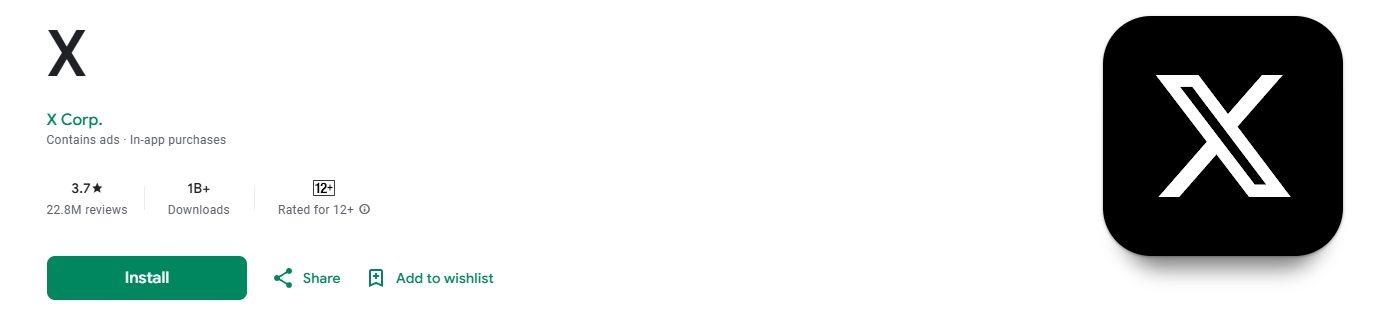

# ***SCRAPING DATA***

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import reviews, Sort
from datetime import datetime

app_id = 'com.twitter.android'

def get_reviews_by_date(app_id, lang='id', country='id', count=10000, start_date='2024-01-01', end_date='2025-08-31'):
    all_reviews = []
    continuation_token = None

    # Konversi tanggal batas
    start_dt = datetime.strptime(start_date, "%Y-%m-%d")
    end_dt = datetime.strptime(end_date, "%Y-%m-%d")

    while True:
        try:
            result, continuation_token = reviews(
                app_id,
                lang=lang,
                country=country,
                sort=Sort.NEWEST,
                count=count,
                continuation_token=continuation_token
            )

            if not result:
                break

            # Filter berdasarkan tanggal posting
            for r in result:
                review_date = r['at']
                if start_dt <= review_date <= end_dt:
                    all_reviews.append(r)
                elif review_date < start_dt:
                    # Jika sudah melewati batas bawah, hentikan loop (karena sudah urut dari yang terbaru)
                    continuation_token = None
                    break

            # Hentikan jika tidak ada continuation_token (sudah habis)
            if continuation_token is None:
                break

            print(f"Total review dikumpulkan: {len(all_reviews)}")

        except Exception as e:
            print("Error:", e)
            break

    return all_reviews


# Jalankan fungsi
filtered_reviews = get_reviews_by_date(
    app_id,
    lang='id',
    country='id',
    count=10000,
    start_date='2025-01-01',
    end_date='2025-10-19'
)

print(f"\nJumlah ulasan dalam rentang waktu: {len(filtered_reviews)}")
if len(filtered_reviews) > 0:
    print("\nContoh ulasan:")
    print(filtered_reviews[0])


Total review dikumpulkan: 9327

Jumlah ulasan dalam rentang waktu: 18750

Contoh ulasan:
{'reviewId': 'c100db51-6e9d-41d1-b73d-35f7c6a06e97', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'kenapa semua akun saya diban, ini sudah yang ke5 kalinya. ayo demo guys, masa karna sering repost dikira spam', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2025, 10, 18, 23, 59, 15), 'replyContent': None, 'repliedAt': None, 'appVersion': None}


In [ ]:
import pandas as pd

# Simpan ke CSV
if len(filtered_reviews) > 0:
    df = pd.DataFrame(filtered_reviews)
    df.to_csv('hasil_scraper_ulasan_app_X.csv', index=False, encoding='utf-8-sig')
else:
    print("Tidak ada ulasan dalam rentang waktu tersebut.")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18750 entries, 0 to 18749
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              18750 non-null  object        
 1   userName              18750 non-null  object        
 2   userImage             18750 non-null  object        
 3   content               18749 non-null  object        
 4   score                 18750 non-null  int64         
 5   thumbsUpCount         18750 non-null  int64         
 6   reviewCreatedVersion  12364 non-null  object        
 7   at                    18750 non-null  datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            12364 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.6+ MB


reviewId         userName  \
0  c100db51-6e9d-41d1-b73d-35f7c6a06e97  Pengguna Google   
1  e6e7e49c-6537-4a11-95f0-56500229d31a  Pengguna Google   
2  b1469e1a-c20e-429b-abb9-8a072657660a  Pengguna Google   
3  59a5a7a5-cf40-4038-9f3f-86b64cf1219f  Pengguna Google   
4  c5190a2a-d815-4f23-91e3-d58fbe36c758  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  kenapa semua akun saya diban, ini sudah yang k...      1              0   
1  saat nonton video tiba² kek heng ,terus muncul...      2              0   
2  aplikasi ini sering tidak stabil,sering logout...      1             54   
3  aplikasi media sosial terburuk yang pernah ada...      1              0   
4  apaan sih ini aplikasi tanpa alasan yang jelas...      1              0   

  reviewCreatedVersion                  at replyContent repliedAt  \
0                 None 2025-10-18 23:59:15         None      None   
1    11.30.0-release.0 2025-10-18 22:10:21         None      None   
2    11.30.0-release.0 2025-10-18 21:37:11         None      None   
3                 None 2025-10-18 21:31:17         None      None   
4                 None 2025-10-18 21:26:59         None      None   

          appVersion  
0               None  
1  11.30.0-release.0  
2  11.30.0-release.0  
3               None  
4               None

# ***PREPROCESSING DATA***

In [ ]:
import pandas as pd

data = pd.read_csv("hasil_scraper_ulasan_app_X.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18750 entries, 0 to 18749
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              18750 non-null  object 
 1   userName              18750 non-null  object 
 2   userImage             18750 non-null  object 
 3   content               18749 non-null  object 
 4   score                 18750 non-null  int64  
 5   thumbsUpCount         18750 non-null  int64  
 6   reviewCreatedVersion  12364 non-null  object 
 7   at                    18750 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            12364 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.6+ MB


reviewId         userName  \
0  c100db51-6e9d-41d1-b73d-35f7c6a06e97  Pengguna Google   
1  e6e7e49c-6537-4a11-95f0-56500229d31a  Pengguna Google   
2  b1469e1a-c20e-429b-abb9-8a072657660a  Pengguna Google   
3  59a5a7a5-cf40-4038-9f3f-86b64cf1219f  Pengguna Google   
4  c5190a2a-d815-4f23-91e3-d58fbe36c758  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  kenapa semua akun saya diban, ini sudah yang k...      1              0   
1  saat nonton video tiba² kek heng ,terus muncul...      2              0   
2  aplikasi ini sering tidak stabil,sering logout...      1             54   
3  aplikasi media sosial terburuk yang pernah ada...      1              0   
4  apaan sih ini aplikasi tanpa alasan yang jelas...      1              0   

  reviewCreatedVersion                   at  replyContent  repliedAt  \
0                  NaN  2025-10-18 23:59:15           NaN        NaN   
1    11.30.0-release.0  2025-10-18 22:10:21           NaN        NaN   
2    11.30.0-release.0  2025-10-18 21:37:11           NaN        NaN   
3                  NaN  2025-10-18 21:31:17           NaN        NaN   
4                  NaN  2025-10-18 21:26:59           NaN        NaN   

          appVersion  
0                NaN  
1  11.30.0-release.0  
2  11.30.0-release.0  
3                NaN  
4                NaN

In [ ]:
# ubah kolom ke datetime (aman jika masih string)
data['at'] = pd.to_datetime(data['at'])

# pisahkan tanggal dan waktu
data['tanggal'] = data['at'].dt.date
data['waktu']   = data['at'].dt.time

data.head()

reviewId         userName  \
0  c100db51-6e9d-41d1-b73d-35f7c6a06e97  Pengguna Google   
1  e6e7e49c-6537-4a11-95f0-56500229d31a  Pengguna Google   
2  b1469e1a-c20e-429b-abb9-8a072657660a  Pengguna Google   
3  59a5a7a5-cf40-4038-9f3f-86b64cf1219f  Pengguna Google   
4  c5190a2a-d815-4f23-91e3-d58fbe36c758  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  kenapa semua akun saya diban, ini sudah yang k...      1              0   
1  saat nonton video tiba² kek heng ,terus muncul...      2              0   
2  aplikasi ini sering tidak stabil,sering logout...      1             54   
3  aplikasi media sosial terburuk yang pernah ada...      1              0   
4  apaan sih ini aplikasi tanpa alasan yang jelas...      1              0   

  reviewCreatedVersion                  at  replyContent  repliedAt  \
0                  NaN 2025-10-18 23:59:15           NaN        NaN   
1    11.30.0-release.0 2025-10-18 22:10:21           NaN        NaN   
2    11.30.0-release.0 2025-10-18 21:37:11           NaN        NaN   
3                  NaN 2025-10-18 21:31:17           NaN        NaN   
4                  NaN 2025-10-18 21:26:59           NaN        NaN   

          appVersion     tanggal     waktu  
0                NaN  2025-10-18  23:59:15  
1  11.30.0-release.0  2025-10-18  22:10:21  
2  11.30.0-release.0  2025-10-18  21:37:11  
3                NaN  2025-10-18  21:31:17  
4                NaN  2025-10-18  21:26:59

In [ ]:
df  = pd.DataFrame(data[['tanggal','waktu','score','content']])
df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  
0  kenapa semua akun saya diban, ini sudah yang k...  
1  saat nonton video tiba² kek heng ,terus muncul...  
2  aplikasi ini sering tidak stabil,sering logout...  
3  aplikasi media sosial terburuk yang pernah ada...  
4  apaan sih ini aplikasi tanpa alasan yang jelas...

**PROSES HAPUS DATA DUPLIKAT**

---



In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18807 entries, 0 to 18806
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  18807 non-null  object
 1   waktu    18807 non-null  object
 2   score    18807 non-null  int64 
 3   content  18806 non-null  object
dtypes: int64(1), object(3)
memory usage: 587.8+ KB


tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  
0  kenapa semua akun saya diban, ini sudah yang k...  
1  saat nonton video tiba² kek heng ,terus muncul...  
2  aplikasi ini sering tidak stabil,sering logout...  
3  aplikasi media sosial terburuk yang pernah ada...  
4  apaan sih ini aplikasi tanpa alasan yang jelas...

In [ ]:
#jumlah data duplikat
data = df[df.duplicated(subset="content", keep=False)]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4869 entries, 10 to 18805
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  4869 non-null   object
 1   waktu    4869 non-null   object
 2   score    4869 non-null   int64 
 3   content  4869 non-null   object
dtypes: int64(1), object(3)
memory usage: 190.2+ KB


tanggal     waktu  score content
10  2025-10-18  19:13:51      5   Bagus
12  2025-10-18  18:36:33      5   bagus
14  2025-10-18  17:54:49      5    good
17  2025-10-18  17:25:36      5    good
18  2025-10-18  17:08:11      5      ok

In [ ]:
#hapus duplikast data
df.drop_duplicates(subset ="content", keep = 'first', inplace = True)
df.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14449 entries, 0 to 18806
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  14449 non-null  object
 1   waktu    14449 non-null  object
 2   score    14449 non-null  int64 
 3   content  14448 non-null  object
dtypes: int64(1), object(3)
memory usage: 564.4+ KB


tanggal     waktu  score content
10  2025-10-18  19:13:51      5   Bagus
12  2025-10-18  18:36:33      5   bagus
14  2025-10-18  17:54:49      5    good
17  2025-10-18  17:25:36      5    good
18  2025-10-18  17:08:11      5      ok

**PROSES CLEANING**

---



In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet


# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

# Fungsi hapus username
def remove_usernames(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@\w+', '', text)
    else:
        return text

df['cleaning'] = df['content'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_usernames(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  
0  kenapa semua akun saya diban ini sudah yang ke...  
1  saat nonton video tiba kek heng terus muncul t...  
2  aplikasi ini sering tidak stabilsering logout ...  
3  aplikasi media sosial terburuk yang pernah ada...  
4  apaan sih ini aplikasi tanpa alasan yang jelas...

**PROSES CASE FOLDING**

---



In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  
0  kenapa semua akun saya diban ini sudah yang ke...  
1  saat nonton video tiba kek heng terus muncul t...  
2  aplikasi ini sering tidak stabilsering logout ...  
3  aplikasi media sosial terburuk yang pernah ada...  
4  apaan sih ini aplikasi tanpa alasan yang jelas...

**Normalisasi Kata**

---



In [ ]:
import pandas as pd
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(df[['tanggal','waktu','score','content','cleaning','case_folding']])
data.head()

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  
0  kenapa semua akun saya diban ini sudah yang ke...  
1  saat nonton video tiba kek heng terus muncul t...  
2  aplikasi ini sering tidak stabilsering logout ...  
3  aplikasi media sosial terburuk yang pernah ada...  
4  apaan sih ini aplikasi tanpa alasan yang jelas...

In [ ]:
# Unduh dan baca kamus dari GitHub
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi normalisasi
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df = pd.DataFrame(data[['tanggal','waktu','score','content','cleaning','case_folding','normalisasi']])
df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                         normalisasi  
0  kenapa semua akun saya diban ini sudah yang ke...  
1  saat menonton video tiba kayak heng terus munc...  
2  aplikasi ini sering tidak stabilsering logout ...  
3  aplikasi media sosial terburuk yang pernah ada...  
4  apaan sih ini aplikasi tanpa alasan yang jelas...

**TOKENIZATION**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                         normalisasi  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat menonton video tiba kayak heng terus munc...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            tokenize  
0  [kenapa, semua, akun, saya, diban, ini, sudah,...  
1  [saat, menonton, video, tiba, kayak, heng, ter...  
2  [aplikasi, ini, sering, tidak, stabilsering, l...  
3  [aplikasi, media, sosial, terburuk, yang, pern...  
4  [apaan, sih, ini, aplikasi, tanpa, alasan, yan...

**PROSES STOPWORD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                         normalisasi  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat menonton video tiba kayak heng terus munc...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            tokenize  \
0  [kenapa, semua, akun, saya, diban, ini, sudah,...   
1  [saat, menonton, video, tiba, kayak, heng, ter...   
2  [aplikasi, ini, sering, tidak, stabilsering, l...   
3  [aplikasi, media, sosial, terburuk, yang, pern...   
4  [apaan, sih, ini, aplikasi, tanpa, alasan, yan...   

                                    stopword removal  
0  [akun, diban, kalinya, ayo, demo, guys, repost...  
1  [menonton, video, kayak, heng, muncul, tulisan...  
2  [aplikasi, stabilsering, logout, sndrilogin, s...  
3  [aplikasi, media, sosial, terburuk, semenjak, ...  
4        [sih, aplikasi, alasan, akun, tangguhkanga]

**PROSES STEAMING**

---



In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                         normalisasi  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat menonton video tiba kayak heng terus munc...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            tokenize  \
0  [kenapa, semua, akun, saya, diban, ini, sudah,...   
1  [saat, menonton, video, tiba, kayak, heng, ter...   
2  [aplikasi, ini, sering, tidak, stabilsering, l...   
3  [aplikasi, media, sosial, terburuk, yang, pern...   
4  [apaan, sih, ini, aplikasi, tanpa, alasan, yan...   

                                    stopword removal  \
0  [akun, diban, kalinya, ayo, demo, guys, repost...   
1  [menonton, video, kayak, heng, muncul, tulisan...   
2  [aplikasi, stabilsering, logout, sndrilogin, s...   
3  [aplikasi, media, sosial, terburuk, semenjak, ...   
4        [sih, aplikasi, alasan, akun, tangguhkanga]   

                                        steming_data  
0            akun ban kali ayo demo guys repost spam  
1  tonton video kayak heng muncul tulis tutup apl...  
2  aplikasi stabilsering logout sndrilogin susahb...  
3  aplikasi media sosial buruk semenjak akuisisi ...  
4                sih aplikasi alas akun tangguhkanga

In [ ]:
from collections import Counter

all_text = ' '.join(df['steming_data'].astype(str))
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

word_list = all_text.split()
word_freq = Counter(word_list)

sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
df_freq = pd.DataFrame(sorted_freq, columns=['Kata', 'Frekuensi'])

df_freq.to_csv('frekuensi_kata_awal.csv', index=False)
print("✅ File 'frekuensi_kata_awal.csv' berhasil disimpan.")
df_freq.info()
df_freq.head(50)

✅ File 'frekuensi_kata_awal.csv' berhasil disimpan.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8943 entries, 0 to 8942
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Kata       8943 non-null   object
 1   Frekuensi  8943 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 139.9+ KB


Kata  Frekuensi
0         akun       3281
1     aplikasi       2524
2         kali       2296
3           ya       2198
4        login       1684
5       banget       1417
6        bagus       1333
7      tangguh       1138
8          apk       1064
9        masuk       1005
10      tolong        898
11        baik        860
12        buka        858
13       salah        773
14      update        727
15     twitter        644
16        suka        593
17         bug        575
18       jelek        561
19         sih        559
20        mulu        546
21       susah        540
22         gue        504
23      teknis        502
24       pakai        480
25        aneh        468
26       bikin        436
27         nih        424
28       orang        424
29       video        406
30        coba        391
31         pas        385
32         log        348
33       error        347
34       lihat        332
35       buruk        330
36         the        329
37         lot        327
38       kayak        316
39      mantap        310
40       ganti        304
41        eror        301
42        kena        293
43        foto        288
44           i        286
45     suspend        280
46  verifikasi        278
47      berita        273
48        guna        261
49      daftar        261

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14449 entries, 0 to 18806
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           14449 non-null  object
 1   waktu             14449 non-null  object
 2   score             14449 non-null  int64 
 3   content           14448 non-null  object
 4   cleaning          14448 non-null  object
 5   case_folding      14448 non-null  object
 6   normalisasi       14449 non-null  object
 7   tokenize          14449 non-null  object
 8   stopword removal  14449 non-null  object
 9   steming_data      14449 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.7+ MB


tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                         normalisasi  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat menonton video tiba kayak heng terus munc...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            tokenize  \
0  [kenapa, semua, akun, saya, diban, ini, sudah,...   
1  [saat, menonton, video, tiba, kayak, heng, ter...   
2  [aplikasi, ini, sering, tidak, stabilsering, l...   
3  [aplikasi, media, sosial, terburuk, yang, pern...   
4  [apaan, sih, ini, aplikasi, tanpa, alasan, yan...   

                                    stopword removal  \
0  [akun, diban, kalinya, ayo, demo, guys, repost...   
1  [menonton, video, kayak, heng, muncul, tulisan...   
2  [aplikasi, stabilsering, logout, sndrilogin, s...   
3  [aplikasi, media, sosial, terburuk, semenjak, ...   
4        [sih, aplikasi, alasan, akun, tangguhkanga]   

                                        steming_data  
0            akun ban kali ayo demo guys repost spam  
1  tonton video kayak heng muncul tulis tutup apl...  
2  aplikasi stabilsering logout sndrilogin susahb...  
3  aplikasi media sosial buruk semenjak akuisisi ...  
4                sih aplikasi alas akun tangguhkanga

In [ ]:
hapus_kata = ['ya', 'ssl', 'lr', 'pas','nih','good','sih']

# hapus kata dari teks
df['steming_data'] = df['steming_data'].apply(
    lambda x: ' '.join([kata for kata in x.split() if kata not in hapus_kata]))

df['steming_data'].str.contains('|'.join(hapus_kata)).sum()

np.int64(2172)

In [ ]:
# ---  Membuat kamus kata tidak baku -> kata baku
kamus_tidak_baku = {
    'apk': 'aplikasi',
    'hp': 'telepon',
    'tv': 'televisi',
}

def perbaiki_kata(teks):
    kata_list = teks.split()
    hasil = [kamus_tidak_baku.get(kata, kata) for kata in kata_list]
    return ' '.join(hasil)

df['steming_data'] = df['steming_data'].astype(str).apply(perbaiki_kata)
df.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                         normalisasi  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat menonton video tiba kayak heng terus munc...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            tokenize  \
0  [kenapa, semua, akun, saya, diban, ini, sudah,...   
1  [saat, menonton, video, tiba, kayak, heng, ter...   
2  [aplikasi, ini, sering, tidak, stabilsering, l...   
3  [aplikasi, media, sosial, terburuk, yang, pern...   
4  [apaan, sih, ini, aplikasi, tanpa, alasan, yan...   

                                    stopword removal  \
0  [akun, diban, kalinya, ayo, demo, guys, repost...   
1  [menonton, video, kayak, heng, muncul, tulisan...   
2  [aplikasi, stabilsering, logout, sndrilogin, s...   
3  [aplikasi, media, sosial, terburuk, semenjak, ...   
4        [sih, aplikasi, alasan, akun, tangguhkanga]   

                                        steming_data  
0            akun ban kali ayo demo guys repost spam  
1  tonton video kayak heng muncul tulis tutup apl...  
2  aplikasi stabilsering logout sndrilogin susahb...  
3  aplikasi media sosial buruk semenjak akuisisi ...  
4                    aplikasi alas akun tangguhkanga

In [ ]:
from collections import Counter
import re

all_text = ' '.join(df['steming_data'].astype(str))
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

word_list = all_text.split()
word_freq = Counter(word_list)

sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
df_freq = pd.DataFrame(sorted_freq, columns=['Kata', 'Frekuensi'])

# df_freq.info()
df_freq.head(50)

Kata  Frekuensi
0     aplikasi       3588
1         akun       3281
2         kali       2296
3        login       1684
4       banget       1417
5        bagus       1333
6      tangguh       1138
7        masuk       1005
8       tolong        898
9         baik        860
10        buka        858
11       salah        773
12      update        727
13     twitter        644
14        suka        593
15         bug        575
16       jelek        561
17        mulu        546
18       susah        540
19         gue        504
20      teknis        502
21       pakai        480
22        aneh        468
23       bikin        436
24       orang        424
25       video        406
26        coba        391
27         log        348
28       error        347
29       lihat        332
30       buruk        330
31         the        329
32         lot        327
33       kayak        316
34      mantap        310
35       ganti        304
36        eror        301
37        kena        293
38        foto        288
39           i        286
40     suspend        280
41  verifikasi        278
42      berita        273
43        guna        261
44      daftar        261
45   postingan        260
46       kasih        258
47       dikit        254
48     bintang        254
49       ulang        241

**WORDCLOUD SETELAH PREPROCESSING**

---



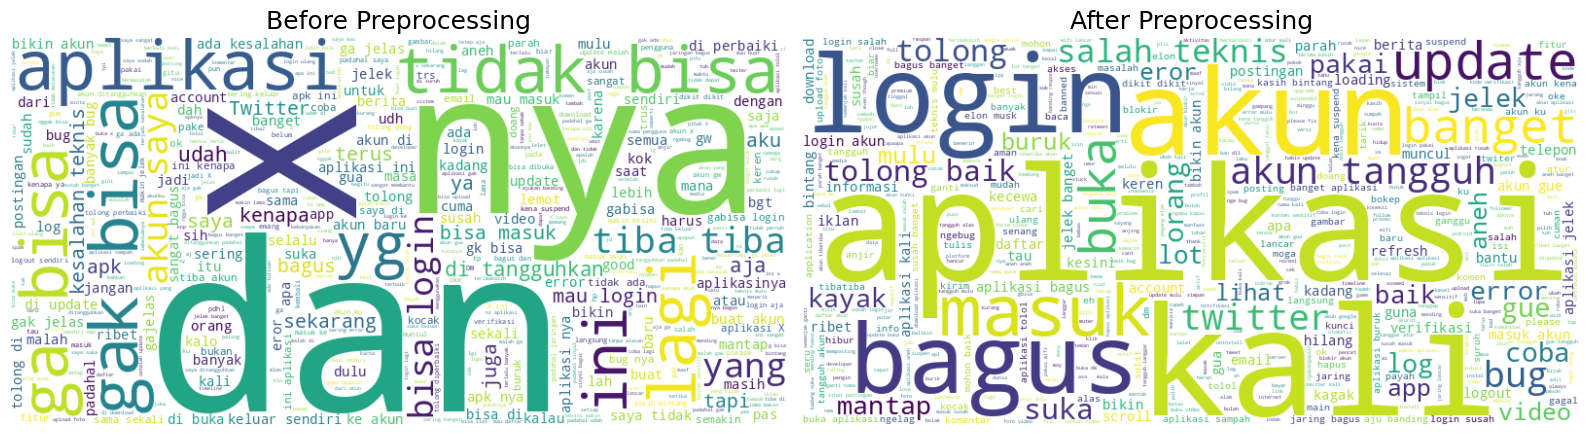

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

# WordCloud Before (dari kolom 'Review Text')
text_before = ' '.join(
    df['content']
    .astype(str)
    .tolist()
)

wc_before = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_before)

# WordCloud After (dari kolom 'stopword removal')
text_after = ' '.join(
    [" ".join(eval(x) if isinstance(x, str) and x.startswith('[') else x.split())
     for x in df['steming_data'].astype(str)]
)

wc_after = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


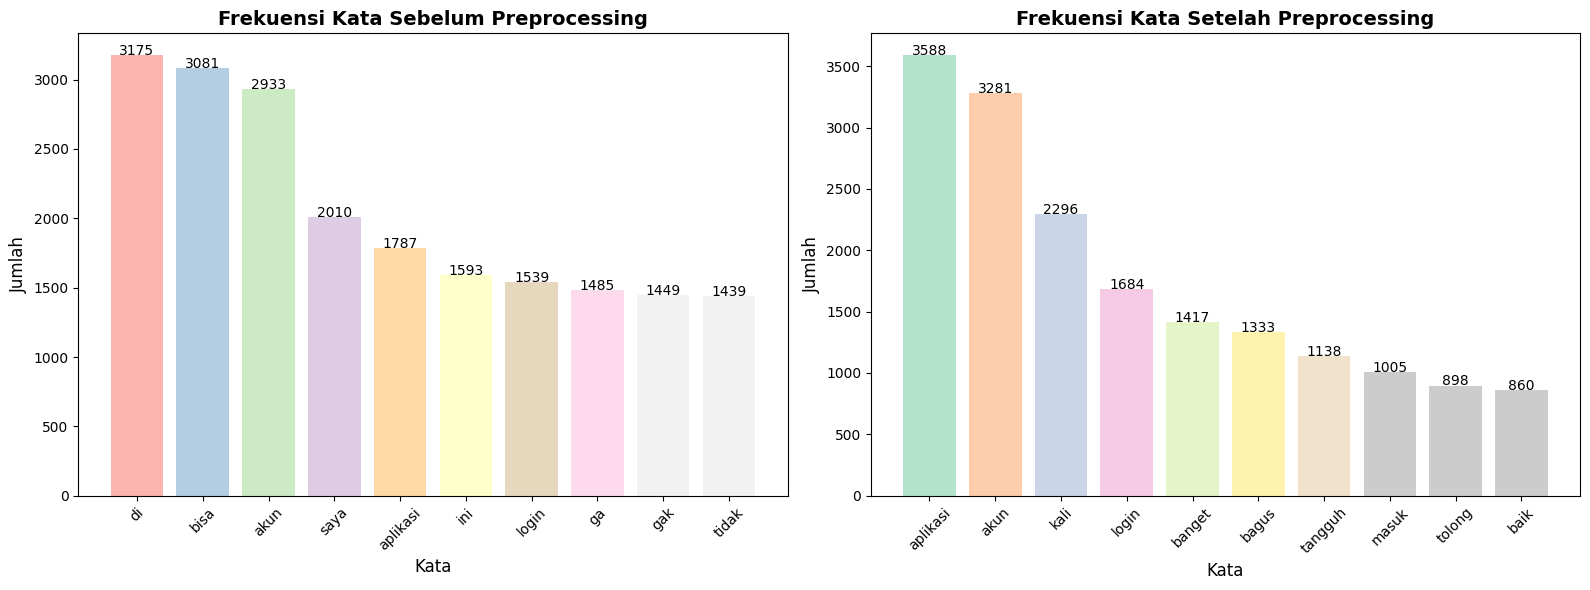

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Set stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya'])

# Fungsi helper untuk membersihkan tanda kutip, [ ], , dll
def clean_text_column(series):
    cleaned = []
    for text in series.astype(str):
        # Hapus [ ], tanda petik tunggal/ganda, koma
        text = re.sub(r"[\[\]\'\",]", "", text)
        cleaned.append(text.strip())
    return " ".join(cleaned)

# BEFORE: kolom
all_text_before = clean_text_column(df["content"])
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom
all_text_after = clean_text_column(df["steming_data"])
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# ***PELEBALAN DATA RATING***

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14449 entries, 0 to 14448
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           14449 non-null  object
 1   waktu             14449 non-null  object
 2   score             14449 non-null  int64 
 3   content           14448 non-null  object
 4   cleaning          14314 non-null  object
 5   case_folding      14314 non-null  object
 6   normalisasi       14302 non-null  object
 7   tokenize          14449 non-null  object
 8   stopword removal  14449 non-null  object
 9   steming_data      14147 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                             content  \
0  kenapa semua akun saya diban, ini sudah yang k...   
1  saat nonton video tiba² kek heng ,terus muncul...   
2  aplikasi ini sering tidak stabil,sering logout...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            cleaning  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                        case_folding  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat nonton video tiba kek heng terus muncul t...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                         normalisasi  \
0  kenapa semua akun saya diban ini sudah yang ke...   
1  saat menonton video tiba kayak heng terus munc...   
2  aplikasi ini sering tidak stabilsering logout ...   
3  aplikasi media sosial terburuk yang pernah ada...   
4  apaan sih ini aplikasi tanpa alasan yang jelas...   

                                            tokenize  \
0  ['kenapa', 'semua', 'akun', 'saya', 'diban', '...   
1  ['saat', 'menonton', 'video', 'tiba', 'kayak',...   
2  ['aplikasi', 'ini', 'sering', 'tidak', 'stabil...   
3  ['aplikasi', 'media', 'sosial', 'terburuk', 'y...   
4  ['apaan', 'sih', 'ini', 'aplikasi', 'tanpa', '...   

                                    stopword removal  \
0  ['akun', 'diban', 'kalinya', 'ayo', 'demo', 'g...   
1  ['menonton', 'video', 'kayak', 'heng', 'muncul...   
2  ['aplikasi', 'stabilsering', 'logout', 'sndril...   
3  ['aplikasi', 'media', 'sosial', 'terburuk', 's...   
4  ['sih', 'aplikasi', 'alasan', 'akun', 'tangguh...   

                                        steming_data  
0            akun ban kali ayo demo guys repost spam  
1  tonton video kayak heng muncul tulis tutup apl...  
2  aplikasi stabilsering logout sndrilogin susahb...  
3  aplikasi media sosial buruk semenjak akuisisi ...  
4                    aplikasi alas akun tangguhkanga

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14147 entries, 0 to 14448
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           14147 non-null  object
 1   waktu             14147 non-null  object
 2   score             14147 non-null  int64 
 3   content           14147 non-null  object
 4   cleaning          14147 non-null  object
 5   case_folding      14147 non-null  object
 6   normalisasi       14147 non-null  object
 7   tokenize          14147 non-null  object
 8   stopword removal  14147 non-null  object
 9   steming_data      14147 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data = pd.DataFrame(data[['tanggal','waktu','score','steming_data']])
data.head(5)

tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                        steming_data  
0            akun ban kali ayo demo guys repost spam  
1  tonton video kayak heng muncul tulis tutup apl...  
2  aplikasi stabilsering logout sndrilogin susahb...  
3  aplikasi media sosial buruk semenjak akuisisi ...  
4                    aplikasi alas akun tangguhkanga

In [ ]:
def label_sentimen(rating):
    if rating in [1, 2]:
        return 'Negatif'
    elif rating == 3:
        return 'Netral'
    elif rating in [4, 5]:
        return 'Positif'
    else:
        return 'tidak valid'

# Terapkan fungsi ke kolom rating
data['Sentiment'] = data['score'].apply(label_sentimen)
data.head(20)

tanggal     waktu  score  \
0   2025-10-18  23:59:15      1   
1   2025-10-18  22:10:21      2   
2   2025-10-18  21:37:11      1   
3   2025-10-18  21:31:17      1   
4   2025-10-18  21:26:59      1   
5   2025-10-18  20:24:57      1   
6   2025-10-18  20:01:20      1   
7   2025-10-18  19:50:21      1   
8   2025-10-18  19:28:59      1   
9   2025-10-18  19:27:42      3   
10  2025-10-18  19:13:51      5   
11  2025-10-18  19:12:16      5   
12  2025-10-18  18:36:33      5   
13  2025-10-18  18:08:13      1   
15  2025-10-18  17:51:25      1   
16  2025-10-18  17:36:21      1   
17  2025-10-18  17:08:11      5   
18  2025-10-18  16:57:53      1   
19  2025-10-18  16:57:23      4   
20  2025-10-18  16:49:09      1   

                                         steming_data Sentiment  
0             akun ban kali ayo demo guys repost spam   Negatif  
1   tonton video kayak heng muncul tulis tutup apl...   Negatif  
2   aplikasi stabilsering logout sndrilogin susahb...   Negatif  
3   aplikasi media sosial buruk semenjak akuisisi ...   Negatif  
4                     aplikasi alas akun tangguhkanga   Negatif  
5                        lupa kali langsung blok akun   Negatif  
6                        akun hapus akun bikin hilang   Negatif  
7   masuk akun login coba bikin akun masuk tolong ...   Negatif  
8               kagak tangguh aju banding balas kagak   Negatif  
9                          perangkat kompatibel versi    Netral  
10                                              bagus   Positif  
11                                             bagong   Positif  
12                                              bagus   Positif  
13  malas main twitter dikit dikit ditangguhin aku...   Negatif  
15          kali bikin akun langgar apa mslah tangguh   Negatif  
16                 aplikasi tangguh langgar apa tolol   Negatif  
17                                                 ok   Positif  
18                               anjeenk akun tangguh   Negatif  
19                                                oke   Positif  
20                                               buka   Negatif

/tmp/ipython-input-1910355637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


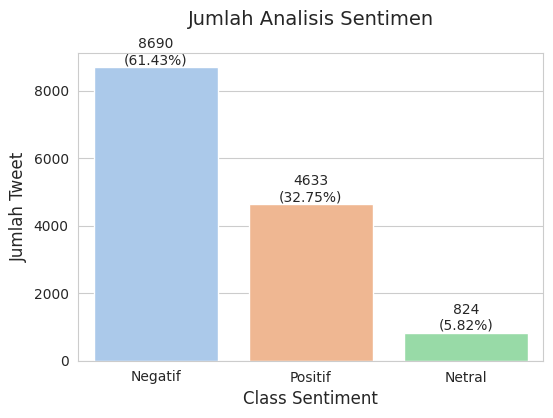

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

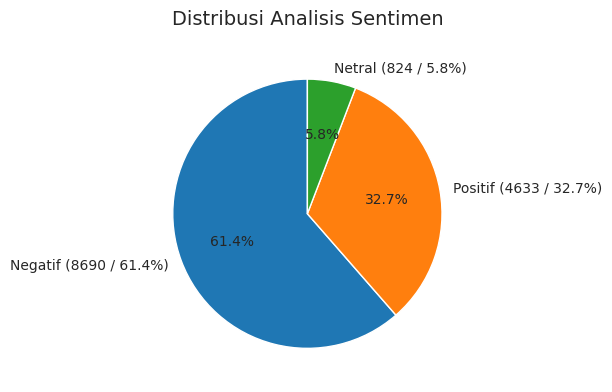

In [ ]:
import matplotlib.pyplot as plt

sentiment_count = data['Sentiment'].value_counts()
total = len(data['Sentiment'])

plt.figure(figsize=(6,6))
plt.pie(
    sentiment_count.values,
    labels=[f"{lbl} ({val} / {val/total*100:.1f}%)" for lbl,val in zip(sentiment_count.index, sentiment_count.values)],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'white'}
)
plt.title('Distribusi Analisis Sentimen', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

In [ ]:
data.to_csv('Hasil_Labelling_Data_3Class.csv',encoding='utf8', index=False)

# ***WORDCLOUD***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3Class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14147 entries, 0 to 14146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       14147 non-null  object
 1   waktu         14147 non-null  object
 2   score         14147 non-null  int64 
 3   steming_data  14147 non-null  object
 4   Sentiment     14147 non-null  object
dtypes: int64(1), object(4)
memory usage: 552.7+ KB


tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                        steming_data Sentiment  
0            akun ban kali ayo demo guys repost spam   Negatif  
1  tonton video kayak heng muncul tulis tutup apl...   Negatif  
2  aplikasi stabilsering logout sndrilogin susahb...   Negatif  
3  aplikasi media sosial buruk semenjak akuisisi ...   Negatif  
4                    aplikasi alas akun tangguhkanga   Negatif

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14147 entries, 0 to 14146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       14147 non-null  object
 1   waktu         14147 non-null  object
 2   score         14147 non-null  int64 
 3   steming_data  14147 non-null  object
 4   Sentiment     14147 non-null  object
dtypes: int64(1), object(4)
memory usage: 552.7+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

steming_data Sentiment
0            akun ban kali ayo demo guys repost spam   Negatif
1  tonton video kayak heng muncul tulis tutup apl...   Negatif
2  aplikasi stabilsering logout sndrilogin susahb...   Negatif
3  aplikasi media sosial buruk semenjak akuisisi ...   Negatif
4                    aplikasi alas akun tangguhkanga   Negatif

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

# Buat wordcloud untuk masing-masing sentimen
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(sentimen_Neutral)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds', stopwords=stopwords).generate(sentimen_Negative)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens', stopwords=stopwords).generate(sentimen_Positive)

# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


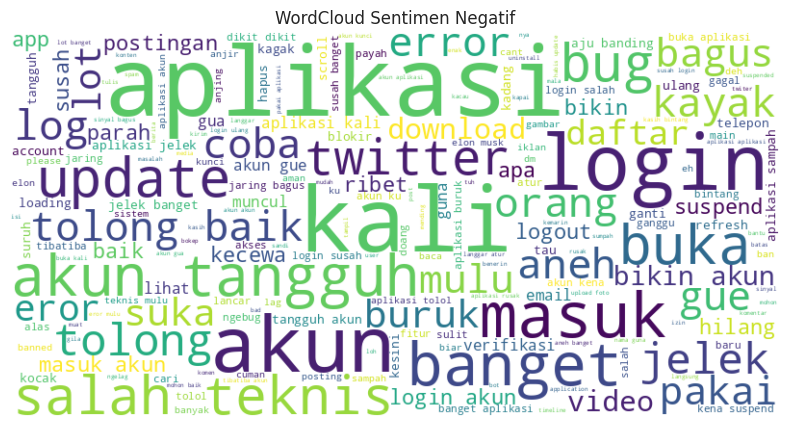

In [ ]:
# Membuat WordCloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

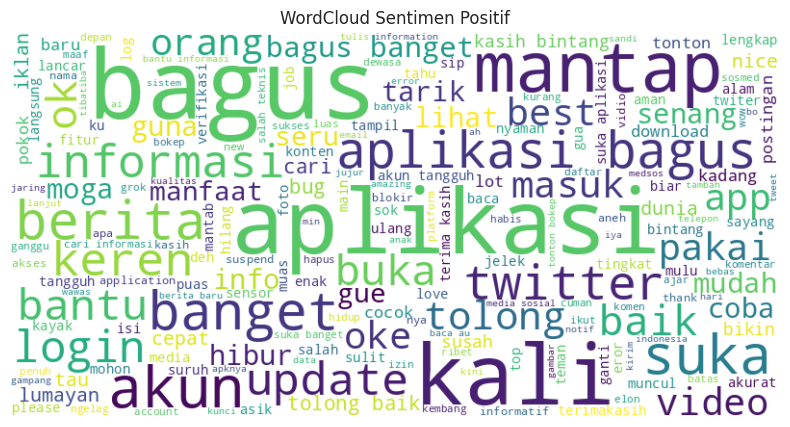

In [ ]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

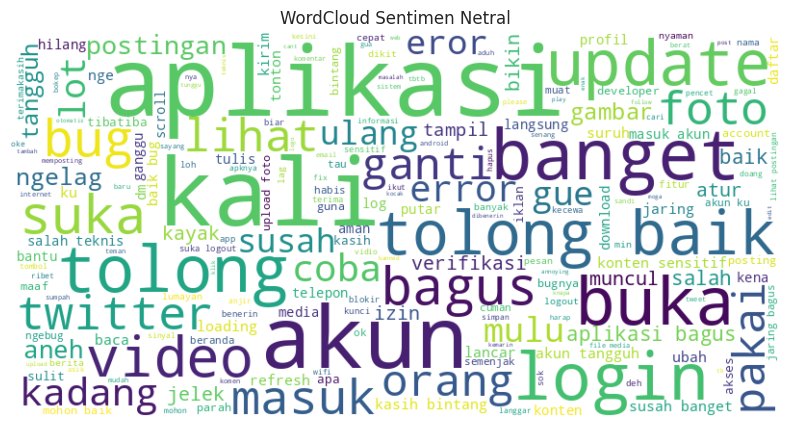

In [ ]:
# Membuat WordCloud untuk sentimen Netral
create_wordcloud(sentimen_Neutral, 'WordCloud Sentimen Netral')

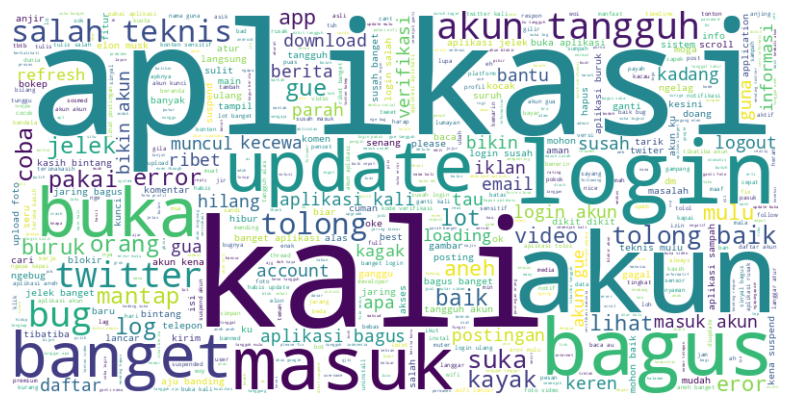

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
data['steming_data'] = data['steming_data'].fillna('')

# Menggabungkan teks dari kolom
text = ' '.join(data['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***FREKUENSI KATA***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3Class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14147 entries, 0 to 14146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       14147 non-null  object
 1   waktu         14147 non-null  object
 2   score         14147 non-null  int64 
 3   steming_data  14147 non-null  object
 4   Sentiment     14147 non-null  object
dtypes: int64(1), object(4)
memory usage: 552.7+ KB


tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                        steming_data Sentiment  
0            akun ban kali ayo demo guys repost spam   Negatif  
1  tonton video kayak heng muncul tulis tutup apl...   Negatif  
2  aplikasi stabilsering logout sndrilogin susahb...   Negatif  
3  aplikasi media sosial buruk semenjak akuisisi ...   Negatif  
4                    aplikasi alas akun tangguhkanga   Negatif

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14147 entries, 0 to 14146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       14147 non-null  object
 1   waktu         14147 non-null  object
 2   score         14147 non-null  int64 
 3   steming_data  14147 non-null  object
 4   Sentiment     14147 non-null  object
dtypes: int64(1), object(4)
memory usage: 552.7+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

steming_data Sentiment
0            akun ban kali ayo demo guys repost spam   Negatif
1  tonton video kayak heng muncul tulis tutup apl...   Negatif
2  aplikasi stabilsering logout sndrilogin susahb...   Negatif
3  aplikasi media sosial buruk semenjak akuisisi ...   Negatif
4                    aplikasi alas akun tangguhkanga   Negatif

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# Pisahkan dataset berdasarkan sentimen
sentimen_Neutral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

# Stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

# Fungsi hitung frekuensi kata + tampilkan jumlah
def plot_word_freq(text, title, color):
    words = [w for w in text.split() if w not in stopwords]
    word_freq = Counter(words).most_common(10)  # ambil 10 kata teratas
    df_freq = pd.DataFrame(word_freq, columns=['Kata', 'Frekuensi'])

    plt.figure(figsize=(8,5))
    bars = plt.barh(df_freq['Kata'], df_freq['Frekuensi'], color=color)
    plt.gca().invert_yaxis()  # biar kata frekuensi tertinggi di atas
    plt.title(f"Top 10 Kata - Sentimen {title}", fontsize=14)
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")

    # Tambahkan label jumlah di ujung bar
    for bar in bars:
        plt.text(
            bar.get_width() + 0.2,  # posisi X sedikit ke kanan
            bar.get_y() + bar.get_height()/2,  # posisi Y di tengah bar
            str(int(bar.get_width())),  # nilai frekuensi
            va='center'
        )

    plt.show()

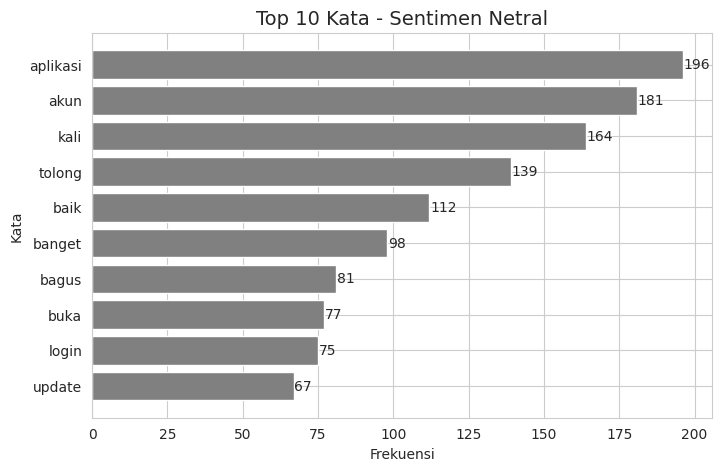

In [ ]:
plot_word_freq(sentimen_Neutral, "Netral", "gray")

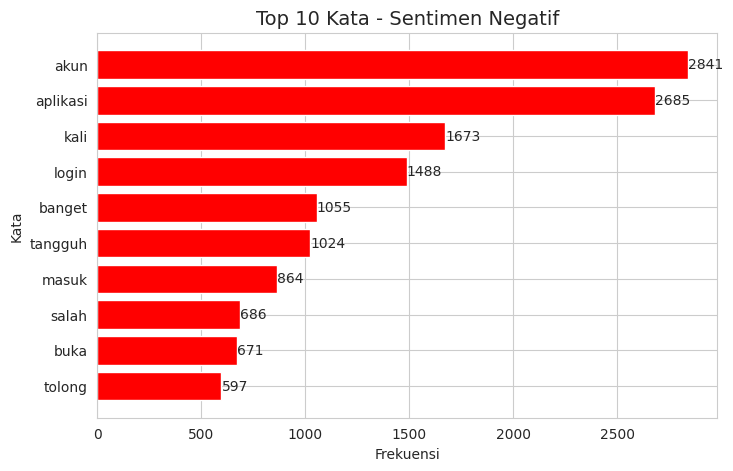

In [ ]:
plot_word_freq(sentimen_Negative, "Negatif", "red")

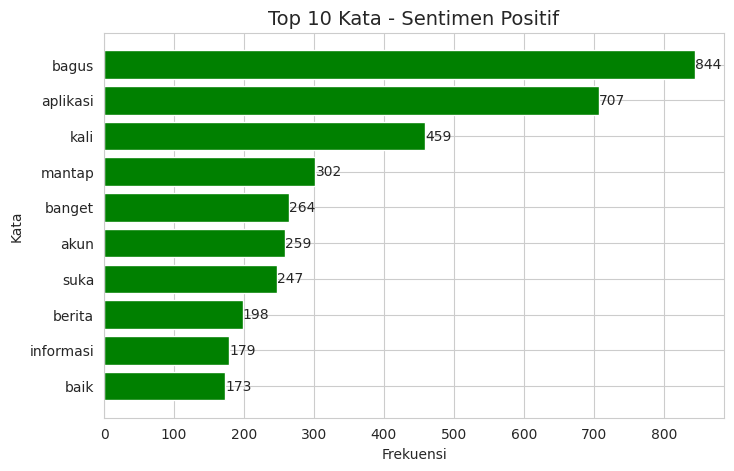

In [ ]:
plot_word_freq(sentimen_Positive, "Positif", "green")

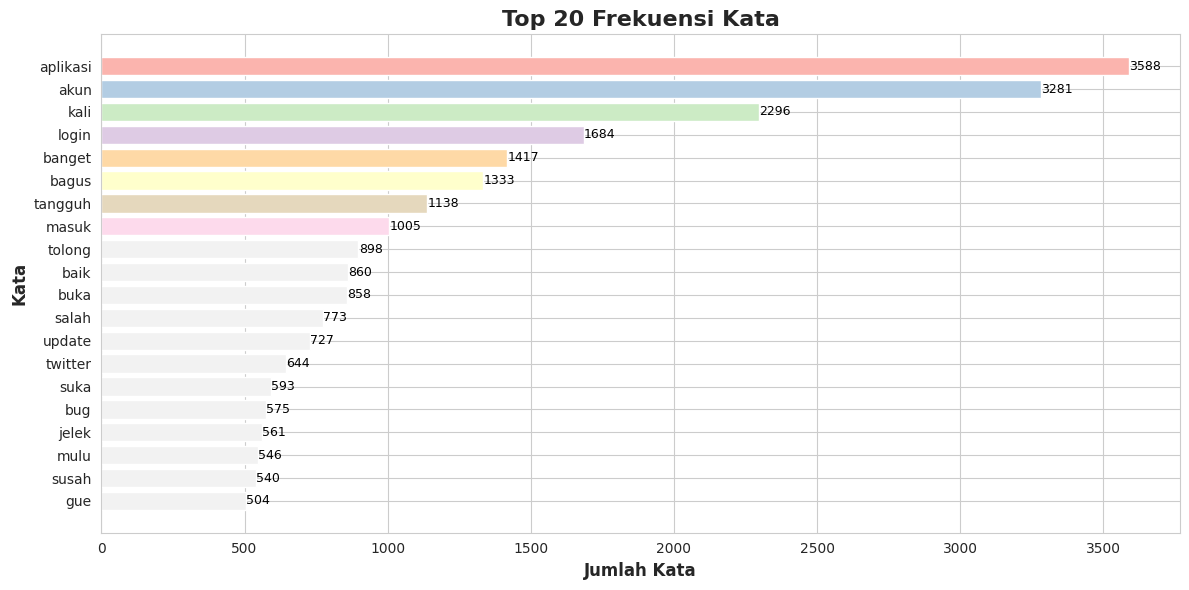

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks
text = " ".join(data["steming_data"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata teratas
top_words = word_counts.most_common(20)
word, count = zip(*top_words)

# Palet warna soft (Pastel)
colors = plt.cm.Pastel1(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.barh(word, count, color=colors)
plt.xlabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.ylabel("Kata", fontsize=12, fontweight='bold')
plt.title("Top 20 Frekuensi Kata", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Biar frekuensi tertinggi di atas

# Tambahkan angka di ujung bar
for bar, num in zip(bars, count):
    plt.text(num + 0.5, bar.get_y() + bar.get_height()/2,
             str(num), va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


# ***N-Gram Frekuensi Kata***



In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data_3Class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14147 entries, 0 to 14146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       14147 non-null  object
 1   waktu         14147 non-null  object
 2   score         14147 non-null  int64 
 3   steming_data  14147 non-null  object
 4   Sentiment     14147 non-null  object
dtypes: int64(1), object(4)
memory usage: 552.7+ KB


tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                        steming_data Sentiment  
0            akun ban kali ayo demo guys repost spam   Negatif  
1  tonton video kayak heng muncul tulis tutup apl...   Negatif  
2  aplikasi stabilsering logout sndrilogin susahb...   Negatif  
3  aplikasi media sosial buruk semenjak akuisisi ...   Negatif  
4                    aplikasi alas akun tangguhkanga   Negatif

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14147 entries, 0 to 14146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       14147 non-null  object
 1   waktu         14147 non-null  object
 2   score         14147 non-null  int64 
 3   steming_data  14147 non-null  object
 4   Sentiment     14147 non-null  object
dtypes: int64(1), object(4)
memory usage: 552.7+ KB


In [ ]:
data = pd.DataFrame(data[['steming_data','Sentiment']])
data.head(5)

steming_data Sentiment
0            akun ban kali ayo demo guys repost spam   Negatif
1  tonton video kayak heng muncul tulis tutup apl...   Negatif
2  aplikasi stabilsering logout sndrilogin susahb...   Negatif
3  aplikasi media sosial buruk semenjak akuisisi ...   Negatif
4                    aplikasi alas akun tangguhkanga   Negatif

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Stopwords tambahan (bisa disesuaikan)
custom_stopwords = set(ENGLISH_STOP_WORDS)
custom_stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh'])

# Fungsi buat ambil n-gram
def get_top_ngrams(corpus, n=3, top_k=10, stopwords=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Fungsi buat plot frekuensi n-gram
def plot_ngrams(corpus, sentiment_label, color_map=plt.cm.Set2, stopwords=None):
    top_ngrams = get_top_ngrams(corpus, n=3, top_k=10, stopwords=stopwords)
    if not top_ngrams:
        print(f"Tidak ada trigram untuk sentimen {sentiment_label}")
        return

    ngrams, counts = zip(*top_ngrams)
    colors = color_map(range(len(ngrams)))

    plt.figure(figsize=(10,6))
    bars = plt.barh(ngrams, counts, color=colors)
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Trigram - Sentimen {sentiment_label}", fontsize=16, fontweight='bold')
    plt.xlabel("Jumlah Kemunculan", fontsize=12)
    plt.ylabel("Trigram", fontsize=12)

    # Tambahin label jumlah di ujung bar
    for bar, num in zip(bars, counts):
        plt.text(num + 0.01, bar.get_y() + bar.get_height()/2,
                 str(num), va='center', fontsize=11, color='black')

    plt.tight_layout()
    plt.show()


# Ambil data per sentimen
corpus_neg = data[data['Sentiment'] == 'Negatif']['steming_data'].astype(str).tolist()
corpus_neu = data[data['Sentiment'] == 'Netral']['steming_data'].astype(str).tolist()
corpus_pos = data[data['Sentiment'] == 'Positif']['steming_data'].astype(str).tolist()

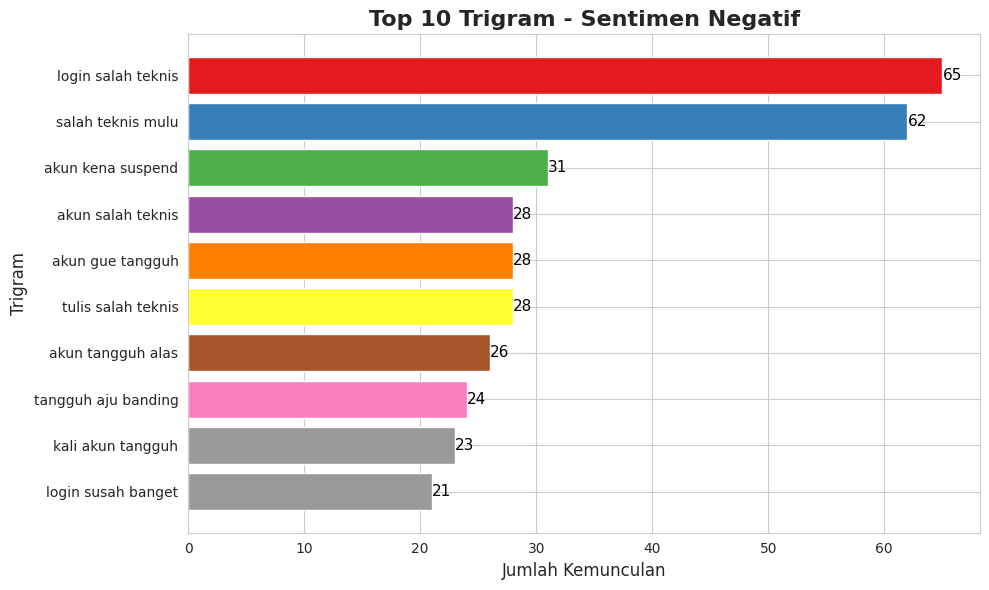

In [ ]:
plot_ngrams(corpus_neg, "Negatif", plt.cm.Set1)

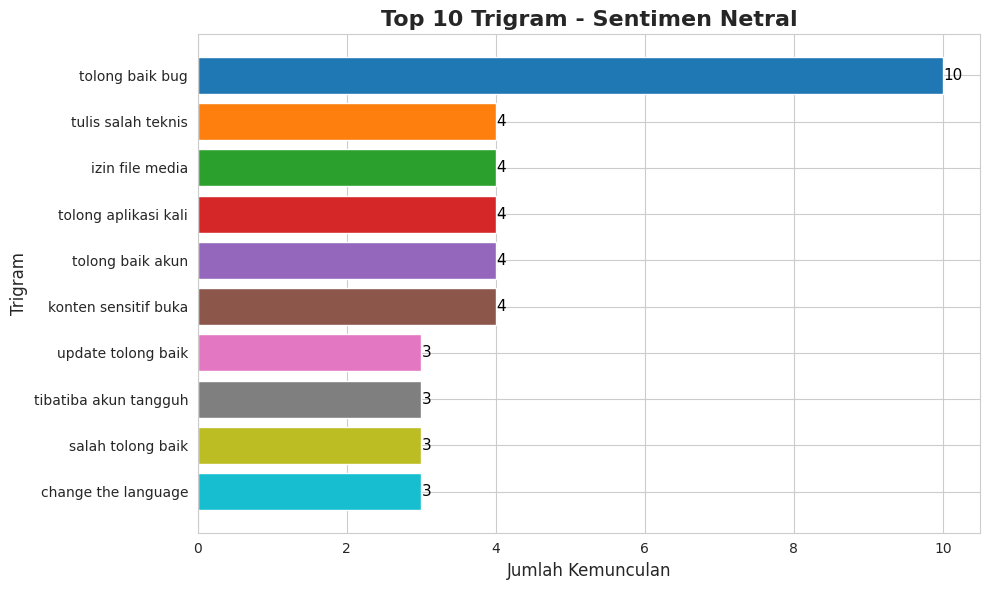

In [ ]:
plot_ngrams(corpus_neu, "Netral", plt.cm.tab10)

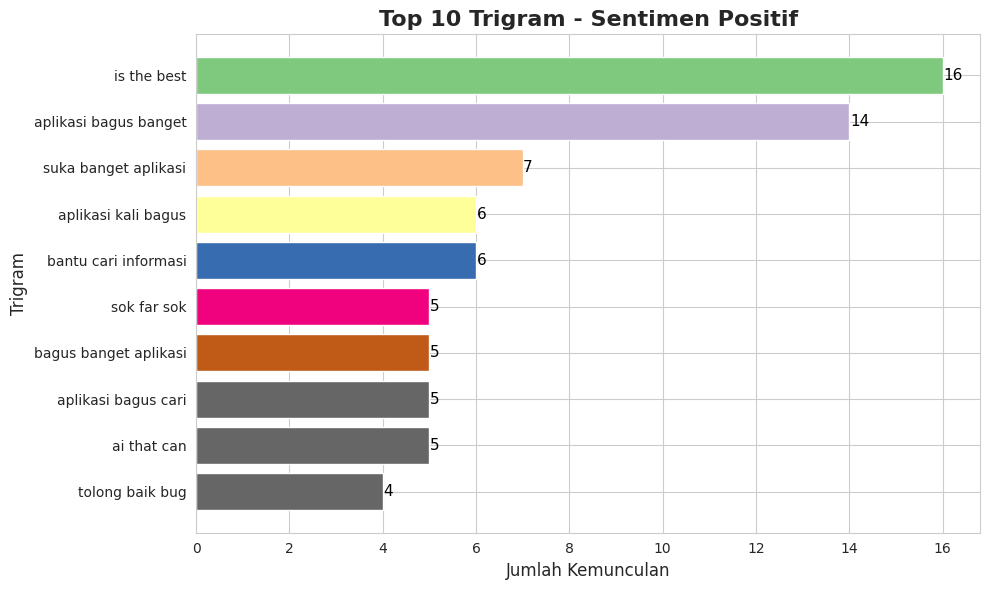

In [ ]:
plot_ngrams(corpus_pos, "Positif", plt.cm.Accent)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['rt'] not in stop_words.
  warnings.warn(


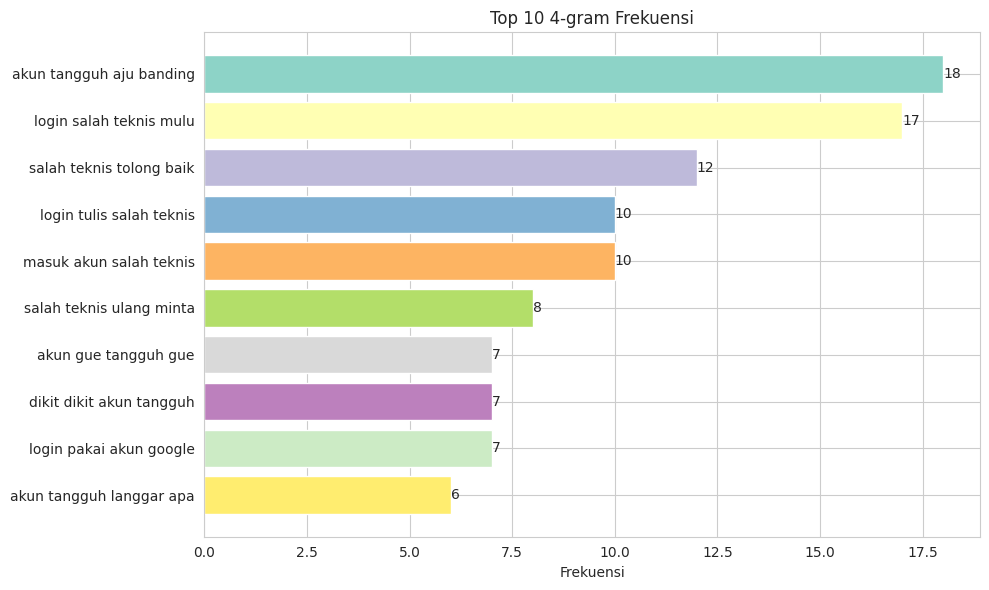

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Daftar stopwords tambahan
custom_stopwords = ['https', 'co', 'RT', '...', 'amp', 'lu', 'deh','an','ai','tha','can']

# Fungsi untuk membuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(4,4), top_n=10, cmap=plt.cm.Set3):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=custom_stopwords)
    X = vectorizer.fit_transform(texts)

    # Hitung total frekuensi setiap n-gram
    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    # Ambil n-gram dengan frekuensi tertinggi
    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    # Buat warna berbeda untuk tiap bar
    colors = cmap(np.linspace(0, 1, len(labels)))

    # Visualisasi
    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=colors[::-1])
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    # Tambahkan label angka di ujung bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan: Visualisasi 4-gram
plot_ngram_frequencies(data['steming_data'], ngram_range=(4,4), top_n=10, cmap=plt.cm.Set3)

# ***Penerapan Means***

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

data = pd.read_csv("Hasil_Labelling_Data_3Class.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14147 entries, 0 to 14146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       14147 non-null  object
 1   waktu         14147 non-null  object
 2   score         14147 non-null  int64 
 3   steming_data  14147 non-null  object
 4   Sentiment     14147 non-null  object
dtypes: int64(1), object(4)
memory usage: 552.7+ KB


tanggal     waktu  score  \
0  2025-10-18  23:59:15      1   
1  2025-10-18  22:10:21      2   
2  2025-10-18  21:37:11      1   
3  2025-10-18  21:31:17      1   
4  2025-10-18  21:26:59      1   

                                        steming_data Sentiment  
0            akun ban kali ayo demo guys repost spam   Negatif  
1  tonton video kayak heng muncul tulis tutup apl...   Negatif  
2  aplikasi stabilsering logout sndrilogin susahb...   Negatif  
3  aplikasi media sosial buruk semenjak akuisisi ...   Negatif  
4                    aplikasi alas akun tangguhkanga   Negatif

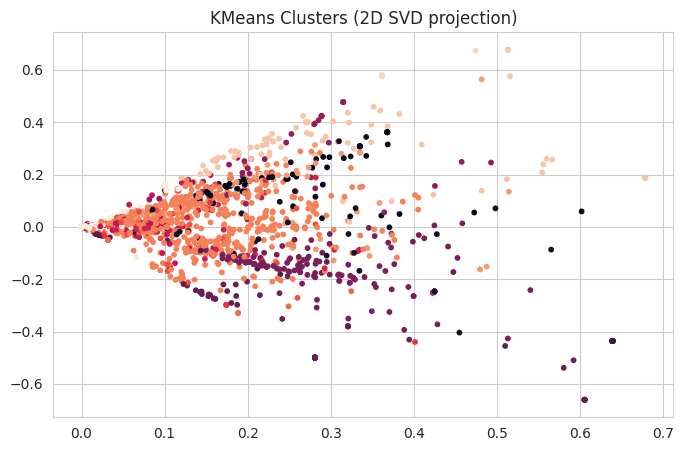

In [ ]:
data = data.sample(n=2000, random_state=42) if len(df)>2000 else df.copy()

# === TFIDF ===
X = TfidfVectorizer(max_features=1500).fit_transform(data['steming_data'].astype(str))

# === KMEANS ===
mb = MiniBatchKMeans(n_clusters=20, random_state=42, batch_size=128).fit(X)
labels = mb.labels_

# === REDUCE to 2D (SVD lebih cepat dari PCA pada sparse) ===
pts = TruncatedSVD(n_components=2, random_state=42).fit_transform(X)

# === PLOT ===
plt.figure(figsize=(8,5))
plt.scatter(pts[:,0], pts[:,1], c=labels, s=10)
plt.title("KMeans Clusters (2D SVD projection)")
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

# ==== PRINT TF-IDF (bagian saja biar tidak meledak) ====
print("Shape TF-IDF:", X.shape)
print("Sample TF-IDF (dense 10x10):")
print(X[:10].toarray()[:, :60])

Shape TF-IDF: (2000, 1500)
Sample TF-IDF (dense 10x10):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.18830369 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         


Jumlah cluster: 20
Distribusi label cluster:
Cluster 0: 69 dokumen
Cluster 1: 40 dokumen
Cluster 2: 1 dokumen
Cluster 3: 18 dokumen
Cluster 4: 19 dokumen
Cluster 5: 58 dokumen
Cluster 6: 134 dokumen
Cluster 7: 41 dokumen
Cluster 8: 1 dokumen
Cluster 9: 181 dokumen
Cluster 10: 53 dokumen
Cluster 11: 22 dokumen
Cluster 12: 105 dokumen
Cluster 13: 21 dokumen
Cluster 14: 642 dokumen
Cluster 15: 67 dokumen
Cluster 16: 1 dokumen
Cluster 17: 85 dokumen
Cluster 18: 15 dokumen
Cluster 19: 427 dokumen


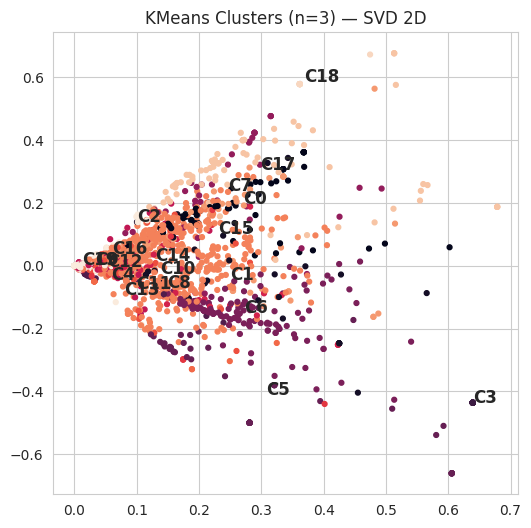

In [ ]:
# ==== PRINT CLUSTER RESULT ====
print("\nJumlah cluster:", len(np.unique(labels)))
print("Distribusi label cluster:")
unique, counts = np.unique(labels, return_counts=True)
for u,c in zip(unique, counts):
    print(f"Cluster {u}: {c} dokumen")

# ==== PLOT ====
plt.figure(figsize=(6,6))
scatter = plt.scatter(pts[:,0], pts[:,1], c=labels, s=12)
for k in np.unique(labels):
    cx = pts[labels==k,0].mean()
    cy = pts[labels==k,1].mean()
    plt.text(cx, cy, f"C{k}", fontsize=12, weight='bold')
plt.title("KMeans Clusters (n=20) — SVD 2D")
plt.show()

In [ ]:
# pastikan 'labels' sudah dibuat
data['cluster'] = labels   # tambahkan hasil cluster ke dataframe

# PRINT contoh kalimat per cluster
for k in sorted(data['cluster'].unique()):
    print(f"\n====== CLUSTER {k} ======")
    sampel = data[data['cluster']==k]['steming_data'].head(10)   # ambil 10 contoh
    for i, txt in enumerate(sampel, 1):
        print(f"{i}. {txt}")

# pastikan cluster sudah jadi kolom
data['cluster'] = labels

# save ke csv
data.to_csv("hasil_cluster.csv", index=False, encoding="utf-8-sig")
data.info()
data.head()



====== CLUSTER 0 ======
1. akun tangguh aktifitas payah
2. akun posting tulis jarang scroll postingan tangguh ganti akun
3. aneh banget bikin akun tangguh
4. akun gua tangguh balikin akun gua
5. akun l
6. salah akun kali tangguh
7. akun tangguh
8. follow akun tau akun notif masuk akun akun tau akun follow akun tolong baik follow akun tau akun muncul notifikasi akun
9. akun ditanghkan
10. kapai akun langsung tangguh aplikasi gj

====== CLUSTER 1 ======
1. jelek
2. aplikasi jelek
3. jelek aplikasi
4. aplikasi jelek
5. jelek aplikasi
6. kagak dowload aplikasimau login ribet jelek
7. aplikasi jelek suspend akun
8. jelek error
9. jelek banget suka henti
10. jelek banget buka

====== CLUSTER 2 ======
1. postingan teman bilang mohon login aduh

====== CLUSTER 3 ======
1. aplikasi
2. aplikasi awikwok
3. aplikasi
4. aplikasi
5. aplikasi
6. aplikasi
7. aplikasi
8. aplikasi
9. aplikasi
10. aplikasi

====== CLUSTER 4 ======
1. mantap we
2. twiter mantap pihak proteksi langgan trimaksih
3. informa

tanggal     waktu  score  \
11108  2025-03-17  16:15:43      1   
1662   2025-09-28  02:17:27      1   
10563  2025-03-30  15:52:45      3   
8391   2025-05-20  11:17:48      1   
3501   2025-08-28  11:13:29      1   

                                            steming_data Sentiment  cluster  
11108                           sumpah akhirini kali lot   Negatif       14  
1662   trash app made even trashier by elon musk full...   Negatif        9  
10563                                             ngebug    Netral       19  
8391                                                buka   Negatif       10  
3501                          kali kali update heran gue   Negatif       14

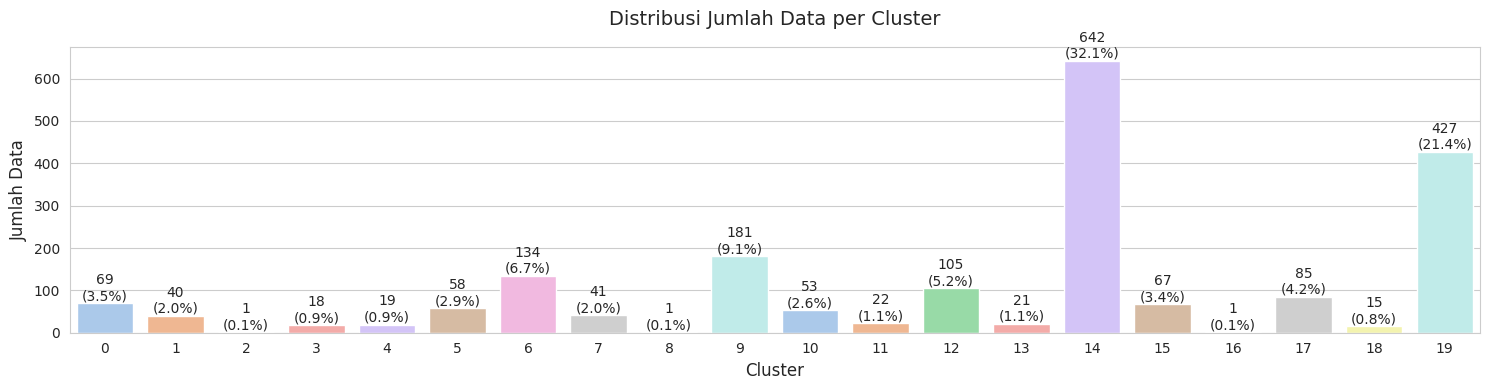

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cluster_count = data['cluster'].value_counts().sort_index()
total = cluster_count.sum()

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 4))

sns.barplot(
    x=cluster_count.index.astype(str),
    y=cluster_count.values,
    hue=cluster_count.index.astype(str),
    palette="pastel",
    legend=False,
    ax=ax
)

ax.set_title("Distribusi Jumlah Data per Cluster", fontsize=14, pad=16)
ax.set_xlabel("Cluster", fontsize=12)
ax.set_ylabel("Jumlah Data", fontsize=12)

for i, count in enumerate(cluster_count.values):
    pct = f"{100*count/total:.1f}%"
    ax.text(i, count, f"{count}\n({pct})", ha="center", va="bottom")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

data = pd.read_csv("hasil_cluster.csv")
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       2000 non-null   object
 1   waktu         2000 non-null   object
 2   score         2000 non-null   int64 
 3   steming_data  2000 non-null   object
 4   Sentiment     2000 non-null   object
 5   cluster       2000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


tanggal     waktu  score  \
0  2025-03-17  16:15:43      1   
1  2025-09-28  02:17:27      1   
2  2025-03-30  15:52:45      3   
3  2025-05-20  11:17:48      1   
4  2025-08-28  11:13:29      1   

                                        steming_data Sentiment  cluster  
0                           sumpah akhirini kali lot   Negatif       14  
1  trash app made even trashier by elon musk full...   Negatif        9  
2                                             ngebug    Netral       19  
3                                               buka   Negatif       10  
4                         kali kali update heran gue   Negatif       14

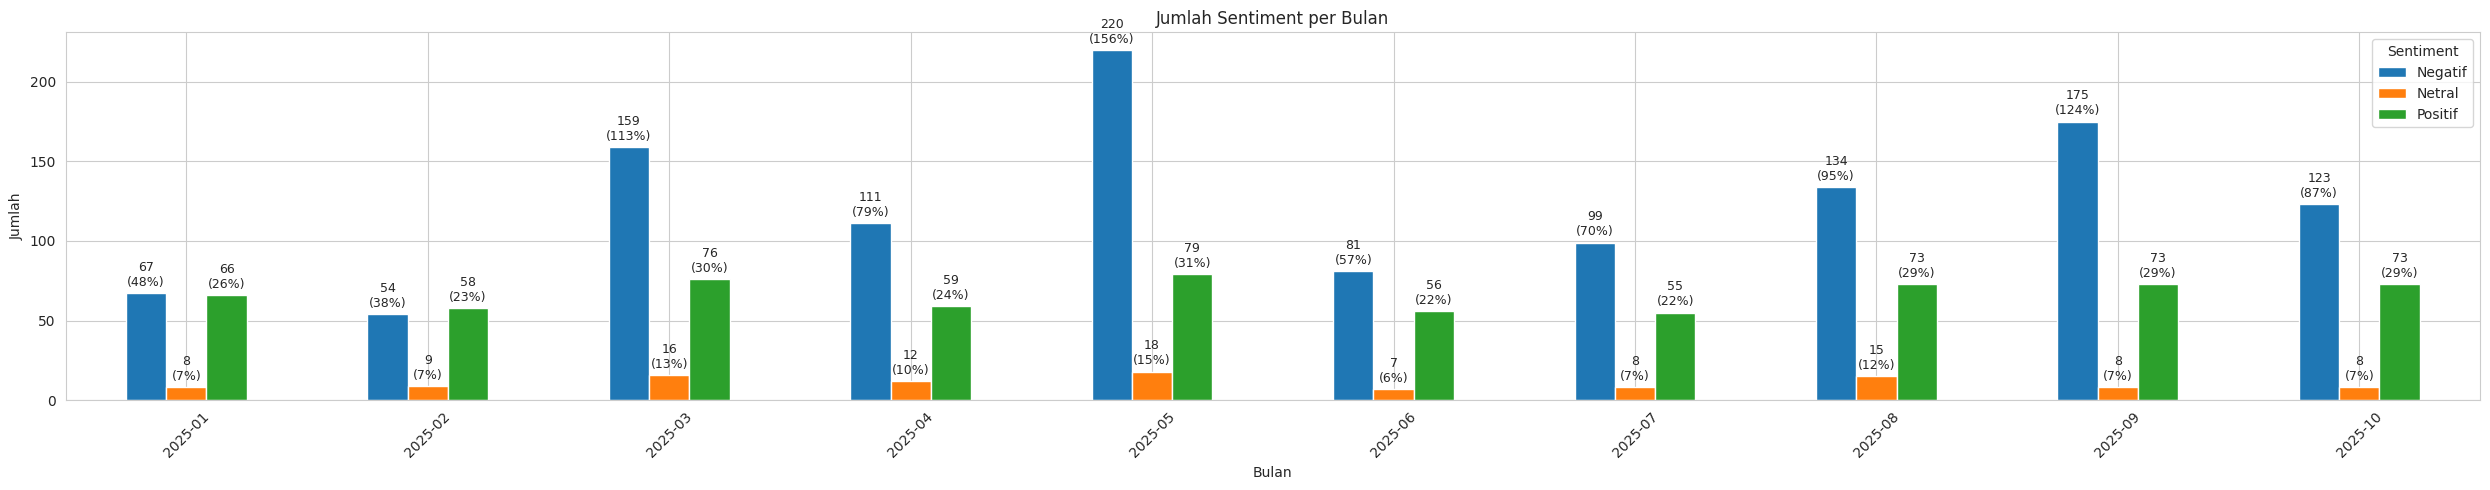

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# pastikan nama kolom benar: 'tanggal' & 'Sentiment'
data['tanggal'] = pd.to_datetime(data['tanggal'])

# --- bikin kolom bulanan (Year-Month) ---
data['year_month'] = data['tanggal'].dt.to_period('M')

# --- hitung banyak sentiment per bulan ---
monthly_counts = data.groupby(['year_month','Sentiment']).size().unstack(fill_value=0)

# --- plot ---
ax = monthly_counts.plot(kind='bar', figsize=(25,5))

plt.title("Jumlah Sentiment per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()

# --- tambahkan label jumlah + persentase ---
for container, month_total in zip(ax.containers, monthly_counts.sum(axis=1)):
    for bar in container:
        height = bar.get_height()
        if height > 0:  # hanya tampilkan kalau ada nilainya
            pct = (height / month_total) * 100
            ax.annotate(f'{int(height)}\n({pct:.0f}%)',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0,3), textcoords='offset points',
                        ha='center', va='bottom', fontsize=9)

plt.show()
